In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from train_utils import train, test
import matplotlib.pyplot as plt
from test_fun import train,test,main

In [2]:
train_dataset = datasets.CIFAR10('./data/cifar', train=True, 
                                download=False,
                                transform=transforms.ToTensor())
test_dataset = datasets.CIFAR10('./data/cifar', train=False,
                               transform=transforms.ToTensor())

print("training set:{},test set:{}\n".format(
    len(train_dataset),len(test_dataset)))

training set:50000,test set:10000



Target:dog
Size of Image:torch.Size([3, 32, 32])


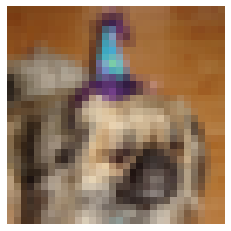

In [3]:
classes = ('plane','car','bird','cat','deer',
          'dog','frog','horse','ship','truck')

idx = torch.randint(0,len(train_dataset),(1,)).item()
random_image = train_dataset[idx][0]
target_num = train_dataset[idx][1]

print('Target:{}'.format(classes[target_num]))
print('Size of Image:{}'.format(random_image.size()))

plt.imshow(random_image.numpy().transpose(1,2,0))
plt.axis("off")
plt.show()

In [4]:
BATCH = 128
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(DEVICE)
STEP = 50
PRINT_STEP = 180

cuda


In [5]:
train_loader = DataLoader(train_dataset,batch_size=BATCH,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=BATCH,shuffle=True)

In [6]:
cfg = {
    'VGG11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'VGG19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}


class VGG(nn.Module):
    def __init__(self, vgg_name):
        super(VGG, self).__init__()
        self.features = self._make_layers(cfg[vgg_name])
        self.classifier = nn.Linear(512, 10)

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out

    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
                           nn.BatchNorm2d(x),
                           nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)


def VGG11():
    return VGG('VGG11')


def VGG13():
    return VGG('VGG13')


def VGG16():
    return VGG('VGG16')


def VGG19():
    return VGG('VGG19')

In [7]:
model = VGG(vgg_name="VGG11").to(DEVICE)

In [8]:
model.parameters

<bound method Module.parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(i

In [9]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


In [10]:
main(model=model, 
     train_loader=train_loader, 
     test_loader=test_loader, 
     loss_func=loss_function, 
     optimizer=optimizer, 
     n_step=STEP,
     device=DEVICE,
     save_path="cifar10_vgg16.pt", 
     print_step=PRINT_STEP)

Train Step: 1 (00.00%)  	Loss: 2.5162
Train Step: 1 (46.08%)  	Loss: 1.1710
Train Step: 1 (92.16%)  	Loss: 0.9264
Test Set: Average loss:1.3327,Accuracy:5426/10000(54.26%)

Train Step: 2 (00.00%)  	Loss: 0.8873
Train Step: 2 (46.08%)  	Loss: 0.9070
Train Step: 2 (92.16%)  	Loss: 0.9743
Test Set: Average loss:0.8045,Accuracy:7158/10000(71.58%)
discard previous state, best model state saved!

Train Step: 3 (00.00%)  	Loss: 0.5929
Train Step: 3 (46.08%)  	Loss: 0.6258
Train Step: 3 (92.16%)  	Loss: 0.6325
Test Set: Average loss:0.7465,Accuracy:7449/10000(74.49%)
discard previous state, best model state saved!

Train Step: 4 (00.00%)  	Loss: 0.4327
Train Step: 4 (46.08%)  	Loss: 0.5253
Train Step: 4 (92.16%)  	Loss: 0.3812
Test Set: Average loss:0.6529,Accuracy:7811/10000(78.11%)
discard previous state, best model state saved!

Train Step: 5 (00.00%)  	Loss: 0.2836
Train Step: 5 (46.08%)  	Loss: 0.2556
Train Step: 5 (92.16%)  	Loss: 0.4298
Test Set: Average loss:0.6249,Accuracy:7875/10000(

Train Step: 44 (46.08%)  	Loss: 0.0271
Train Step: 44 (92.16%)  	Loss: 0.0101
Test Set: Average loss:0.9834,Accuracy:8321/10000(83.21%)

Train Step: 45 (00.00%)  	Loss: 0.0018
Train Step: 45 (46.08%)  	Loss: 0.0012
Train Step: 45 (92.16%)  	Loss: 0.0397
Test Set: Average loss:0.9679,Accuracy:8333/10000(83.33%)

Train Step: 46 (00.00%)  	Loss: 0.0056
Train Step: 46 (46.08%)  	Loss: 0.0384
Train Step: 46 (92.16%)  	Loss: 0.0166
Test Set: Average loss:0.9483,Accuracy:8335/10000(83.35%)

Train Step: 47 (00.00%)  	Loss: 0.0092
Train Step: 47 (46.08%)  	Loss: 0.0014
Train Step: 47 (92.16%)  	Loss: 0.0108
Test Set: Average loss:1.0284,Accuracy:8243/10000(82.43%)

Train Step: 48 (00.00%)  	Loss: 0.0327
Train Step: 48 (46.08%)  	Loss: 0.0253
Train Step: 48 (92.16%)  	Loss: 0.0009
Test Set: Average loss:0.9465,Accuracy:8350/10000(83.50%)

Train Step: 49 (00.00%)  	Loss: 0.0022
Train Step: 49 (46.08%)  	Loss: 0.0019
Train Step: 49 (92.16%)  	Loss: 0.0002
Test Set: Average loss:0.9547,Accuracy:840

In [11]:
model_path = './cifar10_vgg16.pt'
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [12]:
def cal_correct_by_class(model,test_loader,device):
    total = torch.zeros(10)
    correct = torch.zeros(10)
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data.to(device))
            pred = output.cpu().softmax(1).argmax(1)
            correct_idx = pred.masked_select((pred==target))
            correct += torch.zeros(correct_idx.size(0),10)\
                                  .scatter(1,correct_idx.view(-1,1),1).sum(0)
            total += torch.zeros(target.size(0),10).scatter(
                1,target.view(-1,1),1).sum(0)
            
    percentage = correct/total
    return percentage

In [13]:
percentage = cal_correct_by_class(model,test_loader,DEVICE)
for cls_name,percent in zip(classes,percentage):
    print('{} \t:{:05.2f}%'.format(cls_name,percent*100))

plane 	:85.00%
car 	:89.90%
bird 	:74.60%
cat 	:71.00%
deer 	:79.00%
dog 	:77.10%
frog 	:89.10%
horse 	:87.40%
ship 	:93.10%
truck 	:90.10%


In [15]:
model = VGG(vgg_name="VGG13").to(DEVICE)
model.parameters

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

main(model=model, 
     train_loader=train_loader, 
     test_loader=test_loader, 
     loss_func=loss_function, 
     optimizer=optimizer, 
     n_step=STEP,
     device=DEVICE,
     save_path="cifar10_vgg13.pt", 
     print_step=PRINT_STEP)

Train Step: 1 (00.00%)  	Loss: 2.4735
Train Step: 1 (46.08%)  	Loss: 1.3706
Train Step: 1 (92.16%)  	Loss: 0.9816
Test Set: Average loss:1.2079,Accuracy:5886/10000(58.86%)

Train Step: 2 (00.00%)  	Loss: 0.9912
Train Step: 2 (46.08%)  	Loss: 0.9707
Train Step: 2 (92.16%)  	Loss: 0.6891
Test Set: Average loss:0.7913,Accuracy:7218/10000(72.18%)
discard previous state, best model state saved!

Train Step: 3 (00.00%)  	Loss: 0.6737
Train Step: 3 (46.08%)  	Loss: 0.5208
Train Step: 3 (92.16%)  	Loss: 0.6296
Test Set: Average loss:0.8805,Accuracy:7040/10000(70.40%)

Train Step: 4 (00.00%)  	Loss: 0.2868
Train Step: 4 (46.08%)  	Loss: 0.2995
Train Step: 4 (92.16%)  	Loss: 0.4801
Test Set: Average loss:0.6707,Accuracy:7793/10000(77.93%)
discard previous state, best model state saved!

Train Step: 5 (00.00%)  	Loss: 0.3456
Train Step: 5 (46.08%)  	Loss: 0.2772
Train Step: 5 (92.16%)  	Loss: 0.2745
Test Set: Average loss:0.5432,Accuracy:8251/10000(82.51%)
discard previous state, best model state

Train Step: 45 (46.08%)  	Loss: 0.0084
Train Step: 45 (92.16%)  	Loss: 0.0293
Test Set: Average loss:0.7538,Accuracy:8616/10000(86.16%)

Train Step: 46 (00.00%)  	Loss: 0.0009
Train Step: 46 (46.08%)  	Loss: 0.0256
Train Step: 46 (92.16%)  	Loss: 0.0074
Test Set: Average loss:0.8509,Accuracy:8561/10000(85.61%)

Train Step: 47 (00.00%)  	Loss: 0.0002
Train Step: 47 (46.08%)  	Loss: 0.0403
Train Step: 47 (92.16%)  	Loss: 0.0103
Test Set: Average loss:0.8102,Accuracy:8559/10000(85.59%)

Train Step: 48 (00.00%)  	Loss: 0.0031
Train Step: 48 (46.08%)  	Loss: 0.0005
Train Step: 48 (92.16%)  	Loss: 0.0097
Test Set: Average loss:0.7804,Accuracy:8551/10000(85.51%)

Train Step: 49 (00.00%)  	Loss: 0.0091
Train Step: 49 (46.08%)  	Loss: 0.0207
Train Step: 49 (92.16%)  	Loss: 0.0009
Test Set: Average loss:0.8140,Accuracy:8651/10000(86.51%)
discard previous state, best model state saved!

Train Step: 50 (00.00%)  	Loss: 0.0006
Train Step: 50 (46.08%)  	Loss: 0.0126
Train Step: 50 (92.16%)  	Loss: 0

In [16]:
model_path = './cifar10_vgg13.pt'
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [17]:
def cal_correct_by_class(model,test_loader,device):
    total = torch.zeros(10)
    correct = torch.zeros(10)
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data.to(device))
            pred = output.cpu().softmax(1).argmax(1)
            correct_idx = pred.masked_select((pred==target))
            correct += torch.zeros(correct_idx.size(0),10)\
                                  .scatter(1,correct_idx.view(-1,1),1).sum(0)
            total += torch.zeros(target.size(0),10).scatter(
                1,target.view(-1,1),1).sum(0)
            
    percentage = correct/total
    return percentage

percentage = cal_correct_by_class(model,test_loader,DEVICE)
for cls_name,percent in zip(classes,percentage):
    print('{} \t:{:05.2f}%'.format(cls_name,percent*100))

plane 	:88.80%
car 	:93.70%
bird 	:72.40%
cat 	:69.20%
deer 	:83.20%
dog 	:77.60%
frog 	:87.90%
horse 	:92.90%
ship 	:92.00%
truck 	:92.70%


In [18]:
model = VGG(vgg_name="VGG16").to(DEVICE)
model.parameters

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

main(model=model, 
     train_loader=train_loader, 
     test_loader=test_loader, 
     loss_func=loss_function, 
     optimizer=optimizer, 
     n_step=STEP,
     device=DEVICE,
     save_path="cifar10_vgg16-1.pt", 
     print_step=PRINT_STEP)

Train Step: 1 (00.00%)  	Loss: 2.5081
Train Step: 1 (46.08%)  	Loss: 1.6048
Train Step: 1 (92.16%)  	Loss: 1.3572
Test Set: Average loss:2.0069,Accuracy:4463/10000(44.63%)

Train Step: 2 (00.00%)  	Loss: 1.1909
Train Step: 2 (46.08%)  	Loss: 0.7183
Train Step: 2 (92.16%)  	Loss: 0.9560
Test Set: Average loss:1.0442,Accuracy:6497/10000(64.97%)
discard previous state, best model state saved!

Train Step: 3 (00.00%)  	Loss: 0.7843
Train Step: 3 (46.08%)  	Loss: 0.7382
Train Step: 3 (92.16%)  	Loss: 0.6370
Test Set: Average loss:0.7183,Accuracy:7513/10000(75.13%)
discard previous state, best model state saved!

Train Step: 4 (00.00%)  	Loss: 0.4713
Train Step: 4 (46.08%)  	Loss: 0.6405
Train Step: 4 (92.16%)  	Loss: 0.5927
Test Set: Average loss:0.7036,Accuracy:7701/10000(77.01%)
discard previous state, best model state saved!

Train Step: 5 (00.00%)  	Loss: 0.3558
Train Step: 5 (46.08%)  	Loss: 0.4701
Train Step: 5 (92.16%)  	Loss: 0.4026
Test Set: Average loss:0.5623,Accuracy:8149/10000(

Train Step: 45 (46.08%)  	Loss: 0.0004
Train Step: 45 (92.16%)  	Loss: 0.0306
Test Set: Average loss:0.7086,Accuracy:8658/10000(86.58%)

Train Step: 46 (00.00%)  	Loss: 0.0093
Train Step: 46 (46.08%)  	Loss: 0.0144
Train Step: 46 (92.16%)  	Loss: 0.0022
Test Set: Average loss:0.7394,Accuracy:8643/10000(86.43%)

Train Step: 47 (00.00%)  	Loss: 0.0043
Train Step: 47 (46.08%)  	Loss: 0.0178
Train Step: 47 (92.16%)  	Loss: 0.0095
Test Set: Average loss:0.7717,Accuracy:8524/10000(85.24%)

Train Step: 48 (00.00%)  	Loss: 0.0016
Train Step: 48 (46.08%)  	Loss: 0.0044
Train Step: 48 (92.16%)  	Loss: 0.0073
Test Set: Average loss:0.7555,Accuracy:8614/10000(86.14%)

Train Step: 49 (00.00%)  	Loss: 0.0015
Train Step: 49 (46.08%)  	Loss: 0.0049
Train Step: 49 (92.16%)  	Loss: 0.0343
Test Set: Average loss:0.9178,Accuracy:8362/10000(83.62%)

Train Step: 50 (00.00%)  	Loss: 0.0410
Train Step: 50 (46.08%)  	Loss: 0.0020
Train Step: 50 (92.16%)  	Loss: 0.0066
Test Set: Average loss:0.8547,Accuracy:853

In [19]:
model_path = './cifar10_vgg16-1.pt'
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [20]:
def cal_correct_by_class(model,test_loader,device):
    total = torch.zeros(10)
    correct = torch.zeros(10)
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data.to(device))
            pred = output.cpu().softmax(1).argmax(1)
            correct_idx = pred.masked_select((pred==target))
            correct += torch.zeros(correct_idx.size(0),10)\
                                  .scatter(1,correct_idx.view(-1,1),1).sum(0)
            total += torch.zeros(target.size(0),10).scatter(
                1,target.view(-1,1),1).sum(0)
            
    percentage = correct/total
    return percentage

percentage = cal_correct_by_class(model,test_loader,DEVICE)
for cls_name,percent in zip(classes,percentage):
    print('{} \t:{:05.2f}%'.format(cls_name,percent*100))

plane 	:81.10%
car 	:95.10%
bird 	:79.50%
cat 	:83.40%
deer 	:82.80%
dog 	:78.20%
frog 	:86.30%
horse 	:88.50%
ship 	:90.80%
truck 	:87.70%


In [21]:
model = VGG(vgg_name="VGG19").to(DEVICE)
model.parameters

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

main(model=model, 
     train_loader=train_loader, 
     test_loader=test_loader, 
     loss_func=loss_function, 
     optimizer=optimizer, 
     n_step=STEP,
     device=DEVICE,
     save_path="cifar10_vgg19.pt", 
     print_step=PRINT_STEP)

Train Step: 1 (00.00%)  	Loss: 2.4254
Train Step: 1 (46.08%)  	Loss: 1.9430
Train Step: 1 (92.16%)  	Loss: 1.4539
Test Set: Average loss:1.5298,Accuracy:4607/10000(46.07%)

Train Step: 2 (00.00%)  	Loss: 1.3286
Train Step: 2 (46.08%)  	Loss: 1.0469
Train Step: 2 (92.16%)  	Loss: 1.0590
Test Set: Average loss:1.2267,Accuracy:5764/10000(57.64%)
discard previous state, best model state saved!

Train Step: 3 (00.00%)  	Loss: 0.7739
Train Step: 3 (46.08%)  	Loss: 0.8941
Train Step: 3 (92.16%)  	Loss: 0.7749
Test Set: Average loss:0.9232,Accuracy:6891/10000(68.91%)
discard previous state, best model state saved!

Train Step: 4 (00.00%)  	Loss: 0.6465
Train Step: 4 (46.08%)  	Loss: 0.8124
Train Step: 4 (92.16%)  	Loss: 0.5415
Test Set: Average loss:0.9740,Accuracy:6897/10000(68.97%)
discard previous state, best model state saved!

Train Step: 5 (00.00%)  	Loss: 0.5752
Train Step: 5 (46.08%)  	Loss: 0.5571
Train Step: 5 (92.16%)  	Loss: 0.5552
Test Set: Average loss:0.7360,Accuracy:7637/10000(

Train Step: 43 (92.16%)  	Loss: 0.0148
Test Set: Average loss:0.7468,Accuracy:8634/10000(86.34%)

Train Step: 44 (00.00%)  	Loss: 0.0293
Train Step: 44 (46.08%)  	Loss: 0.0327
Train Step: 44 (92.16%)  	Loss: 0.0193
Test Set: Average loss:0.7349,Accuracy:8606/10000(86.06%)

Train Step: 45 (00.00%)  	Loss: 0.0504
Train Step: 45 (46.08%)  	Loss: 0.0125
Train Step: 45 (92.16%)  	Loss: 0.0047
Test Set: Average loss:0.7803,Accuracy:8562/10000(85.62%)

Train Step: 46 (00.00%)  	Loss: 0.0063
Train Step: 46 (46.08%)  	Loss: 0.0159
Train Step: 46 (92.16%)  	Loss: 0.0544
Test Set: Average loss:0.6959,Accuracy:8584/10000(85.84%)

Train Step: 47 (00.00%)  	Loss: 0.0156
Train Step: 47 (46.08%)  	Loss: 0.0261
Train Step: 47 (92.16%)  	Loss: 0.0183
Test Set: Average loss:0.8219,Accuracy:8616/10000(86.16%)

Train Step: 48 (00.00%)  	Loss: 0.0017
Train Step: 48 (46.08%)  	Loss: 0.0054
Train Step: 48 (92.16%)  	Loss: 0.0015
Test Set: Average loss:0.7962,Accuracy:8592/10000(85.92%)

Train Step: 49 (00.00%

In [22]:
model_path = './cifar10_vgg19.pt'
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [23]:
def cal_correct_by_class(model,test_loader,device):
    total = torch.zeros(10)
    correct = torch.zeros(10)
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data.to(device))
            pred = output.cpu().softmax(1).argmax(1)
            correct_idx = pred.masked_select((pred==target))
            correct += torch.zeros(correct_idx.size(0),10)\
                                  .scatter(1,correct_idx.view(-1,1),1).sum(0)
            total += torch.zeros(target.size(0),10).scatter(
                1,target.view(-1,1),1).sum(0)
            
    percentage = correct/total
    return percentage

percentage = cal_correct_by_class(model,test_loader,DEVICE)
for cls_name,percent in zip(classes,percentage):
    print('{} \t:{:05.2f}%'.format(cls_name,percent*100))

plane 	:85.70%
car 	:89.90%
bird 	:81.40%
cat 	:68.20%
deer 	:89.10%
dog 	:69.90%
frog 	:91.60%
horse 	:88.60%
ship 	:89.50%
truck 	:94.60%
